In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [2]:
## Scrap the Data from Internet
html = urlopen('https://en.wikipedia.org/wiki/Hydroelectric_power_in_the_United_States')
soup = BeautifulSoup(html.read(),'html.parser')
tables = soup.find_all('table', {'class':'wikitable'})

# Search through the tables for the one with the headings we want.
for table in tables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
    if headings[:4] == ['Year', 'Summer capacity']:
        break
# Extract the columns we want and write to a semicolon-delimited text file.
column_list = ['Year','Summer Capacity','Electricity Generation','Capacity Factor','Year Growth Capacity',\
               'Year Growth Produced', 'Portion of Renewable', 'Portion of Total']
hydro = pd.DataFrame(index = list(range(15)), columns = column_list)
data_list = list()
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    if not tds:
        continue
    Data = [td.text.strip() for td in tds]
    data_list.append(Data)

data_list = np.array(data_list)
count = 0 
for col in column_list:
    hydro[col] = data_list[:,count]
    count += 1
#energy.to_csv (r'C:\Users\yanbo_000\Desktop\143Project\energy_consumpton_USA.csv', index = None, header=True)
html.close()

In [3]:
def convert_to_list(pd):
    for i in range(len(pd)):
        string = str(pd[i])
        num = string.replace('%','')
        num = num.replace(',','')
        num = float(num)
        pd[i] = num
    return pd

[6.76 6.67 7.12 5.95 6.19 6.92 6.31 7.79 6.82 6.61 6.32 6.11 6.57 7.44
 7.  ]
[91.14719749 91.1737462  90.50286781 91.52180108 90.74738416 89.43027341
 89.63534823 87.47789744 87.78871979 87.15007776 86.8141039  86.65064453
 85.03416856 82.97482838 82.88508557]


Text(0,0.5,'Percentage')

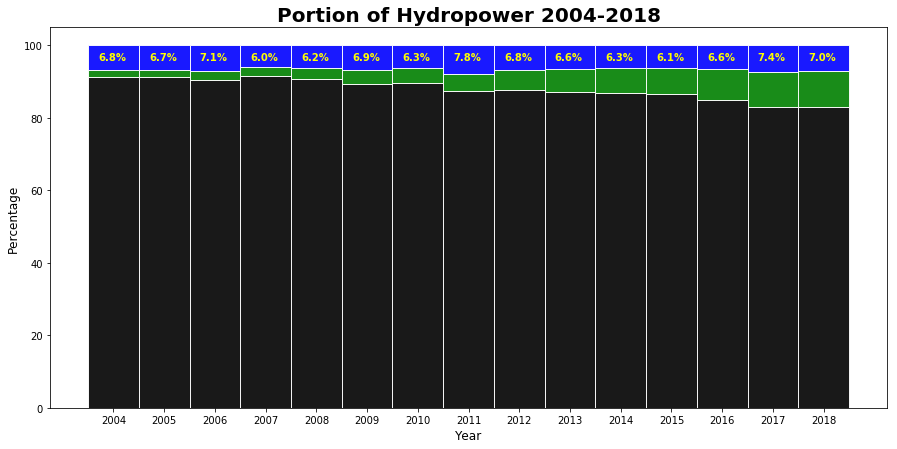

In [4]:
plt.figure(figsize=(15,7))
#get year
year = list(hydro['Year'])[::-1]
#get portion of total
percent_hydro = list(hydro['Portion of Total'])[::-1]
percent_hydro = convert_to_list(percent_hydro) 
# get other_renewable portion 
percent_other_renewable = list(hydro['Portion of Renewable'])[::-1]
percent_other_renewable = convert_to_list(percent_other_renewable) 
percent_other_renewable = np.array(percent_hydro) / np.array(percent_other_renewable) * 100 - np.array(percent_hydro)
# get fossil 
print(np.array(percent_hydro))
percent_fossil = 100 - percent_other_renewable - np.array(percent_hydro)
print(percent_fossil)

bar_width = 1 
# positions of the left bar-boundaries
bar_l = [i for i in range(len(year))] 
# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar chart 
plt.bar(bar_l, percent_fossil, label='Fossil', alpha=0.9, color='black', width=bar_width, edgecolor='white', tick_label = year)
plt.bar(bar_l, percent_other_renewable, bottom = percent_fossil, label='Other_renewable', alpha=0.9, color='green', width=bar_width,edgecolor='white')
plt.bar(bar_l, percent_hydro, bottom = percent_other_renewable + percent_fossil, label='Hydro', alpha=0.9, color='blue', width=bar_width,edgecolor='white')

for v in range(len(percent_hydro)):
    value = '%0.1f' % percent_hydro[v]
    plt.text(x = v-0.3, y = 96, s = value + '%', color='yellow', fontweight='bold',fontsize =10)


plt.title('Portion of Hydropower 2004-2018', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel("Percentage",fontsize=12)

In [5]:
## Scrap the Data from Internet
html = urlopen('https://en.wikipedia.org/wiki/List_of_U.S._states_by_electricity_production_from_renewable_sources')
soup = BeautifulSoup(html.read(),'html.parser')
tables = soup.find_all('table', {'class':'wikitable'})

# Search through the tables for the one with the headings we want.
table = tables[0]
# Extract the columns we want and write to a semicolon-delimited text file.
column_list = ['Rank','Rank w/o Hydropower','state','with Hydro', 'w/o Hydro','with Hydro(GWH)',\
               'w/o Hydro(GWH)', 'Total electricity']
statehydro = pd.DataFrame(index = list(range(51)), columns = column_list)
data_list = list()
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    if not tds:
        continue
    Data = [td.text.strip() for td in tds]
    data_list.append(Data)

data_list = np.array(data_list)
count = 0 
for col in column_list:
    statehydro[col] = data_list[:,count]
    count += 1
print(statehydro)
#energy.to_csv (r'C:\Users\yanbo_000\Desktop\143Project\energy_consumpton_USA.csv', index = None, header=True)
html.close()

   Rank Rank w/o Hydropower           state with Hydro w/o Hydro  \
0                             United States       17.1       9.6   
1     1                   2         Vermont       99.6      41.3   
2     2                  10           Idaho       81.6      21.9   
3     3                  21      Washington       80.0       8.2   
4     4                  16          Oregon       76.3      13.6   
5     5                   1           Maine       75.9      46.1   
6     6                   6    South Dakota       73.1      30.2   
7     7                   8      California       47.2      26.5   
8     8                  23         Montana       45.1       7.8   
9     9                   3            Iowa       38.8      37.2   
10   10                   4          Kansas       36.2      36.1   
11   11                   5        Oklahoma       36.1      32.3   
12   12                  35          Alaska       33.3      3.45   
13   13                   7    North Dakota     

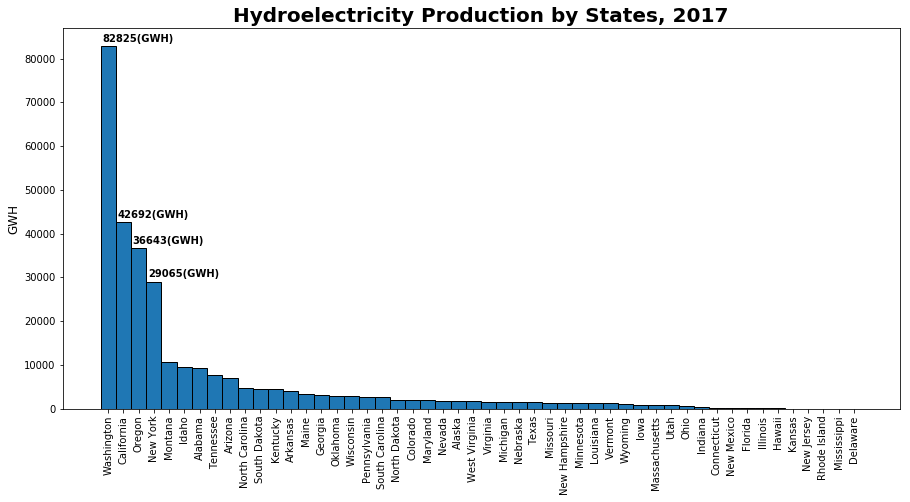

In [6]:
renew = list(statehydro['with Hydro(GWH)'])
renew = convert_to_list(renew) 
woHydro = list(statehydro['w/o Hydro(GWH)'])
woHydro = convert_to_list(woHydro)
hydro = np.array(renew) - np.array(woHydro)
hydro = hydro[1:]
state = list(statehydro['state'])[1:]
hydro_dict = dict(zip(state,hydro))
hydro_dict = sorted(hydro_dict.items(), key = lambda x:x[1], reverse = True)
hydro_dict = dict(hydro_dict)
# Plot the bar chart
state = list(hydro_dict.keys())
plt.figure(figsize=(15,7))
plt.bar(range(len(state)), hydro_dict.values(), width=1, \
        tick_label = state, edgecolor = 'black') # plot features importances
text = sorted(hydro,reverse = True)
for v in range(len(state)-46):
    value = '%1.0f' % text[v]
    plt.text(x = v-0.4, y = text[v] + 1000, s = value + '(GWH)', color='black', fontweight='bold',fontsize =10)
plt.ylabel('GWH', fontsize=12)
plt.title('Hydroelectricity Production by States, 2017',fontsize = 20, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

https://www.energy.gov/articles/energy-dept-report-finds-major-potential-grow-clean-sustainable-us-hydropower

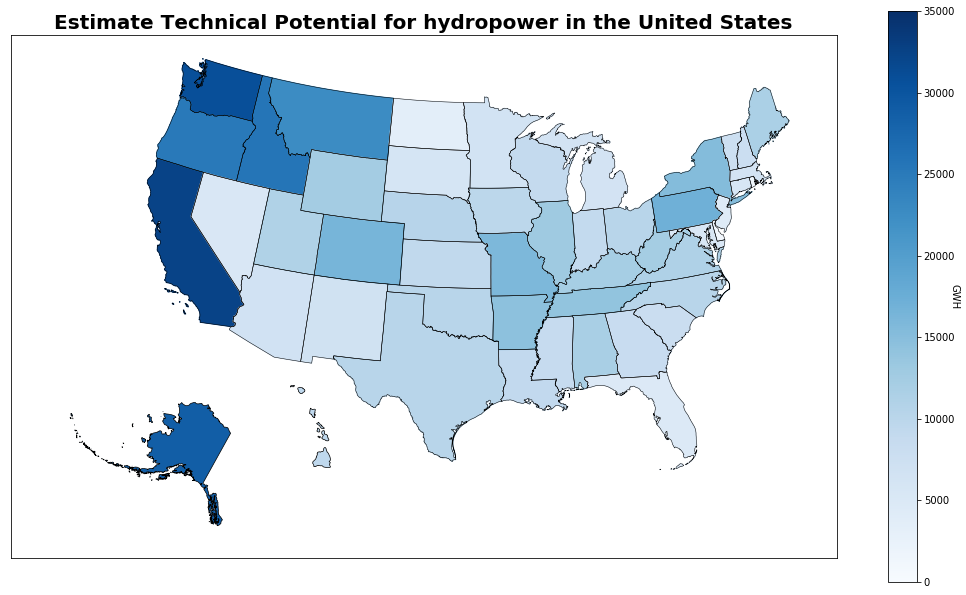

In [18]:
'''
    projection: Lambert Conformal Projection (lcc)
    llcrnrlon: longitude of lower left hand corner of the desired map domain (-119)
    llcrnrlat:latitude of lower left hand corner of the desired map domain (22)
    urcrnrlon:longitude of upper right hand corner of the desired map domain (64)
    urcrnrlat:latitude of upper right hand corner of the desired map domain (49)
    lon_0:center of desired map domain (-95).
    resolution: high
'''
fig = plt.figure(figsize=(18.5, 10.5))
m = Basemap(llcrnrlon=-125,llcrnrlat=15,urcrnrlon=-60,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95,resolution='l')
# draw state boundaries.
# data from U.S Census Bureau
shp_info = m.readshapefile('cb_2018_us_state_5m','states',drawbounds=True)
# Energy comsumption by 2016
# https://www.eia.gov/state/seds/sep_sum/html/pdf/sum_btu_1.pdf
hydroPotential = {
'New Jersey':  549,
'Rhode Island':   59,
'Massachusetts':   1197,
'Connecticut':    922,
'Maryland':   814,
'New York':    6711,
'Delaware':    31,
'Florida':     682,
'Ohio':  3046,
'Pennsylvania':  8368,
'Illinois':    4883,
'California':  30024,
'Hawaii':  2602,
'Virginia':    3657,
'Michigan':    1181,
'Indiana':    2394,
'North Carolina':  3037,
'Georgia':     1988,
'Tennessee':   5745,
'New Hampshire':   1741,
'South Carolina':  1889,
'Louisiana':   2423,
'Kentucky':   4255,
'Wisconsin':  2287,
'Washington':  27249,
'Alabama':     4103,
'Missouri':    7198,
'Texas':   3006,
'West Virginia':   4408,
'Vermont':     1710,
'Minnesota':  1255,
'Mississippi':   2211,
'Iowa':  2818,
'Arkansas':    6093,
'Oklahoma':    3016,
'Arizona':     1303,
'Colorado':    7789,
'Maine':  3916,
'Oregon':  18184,
'Kansas':  2508,
'Utah':  3528,
'Nebraska':    3142,
'Nevada':  846,
'Idaho':   18758,
'New Mexico':  1363,
'South Dakota':  1047,
'North Dakota':  347,
'Montana':     14547,
'Wyoming':      4445,
'Alaska':     23676}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.Blues_r # use 'hot' colormap
vmin = 0; vmax = 35000 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico', 'United States Virgin Islands',\
                         'Guam','Commonwealth of the Northern Mariana Islands','American Samoa']:
        pop = hydroPotential[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico', 'United States Virgin Islands',\
                         'Guam','Commonwealth of the Northern Mariana Islands','American Samoa']:
        # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
            seg1 = list(map(lambda x : (0.35 * x[0] + 1100000, 0.35 * x[1]-1300000), seg))
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg1,facecolor=color,edgecolor='black',linewidth = 0.7)
            ax.add_patch(poly)
        if statenames[nshape] == 'Hawaii':
            seg1 = list(map(lambda x: (x[0] + 5000000, x[1]-1400000), seg))
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg1,facecolor=color,edgecolor='black',linewidth = 0.7)
            ax.add_patch(poly)
        else:   
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
            
# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='Blues' , norm=plt.Normalize(vmin=0, vmax=35000))
sm._A = []

cbar = fig.colorbar(sm)
cbar.set_label('GWH', rotation=270)
        
plt.title('Estimate Technical Potential for hydropower in the United States',fontsize = 20, fontweight='bold')
plt.show()